## Numerical simulation of 2D Allen- cahn equation

#### we consider numerical equation for the  numerical simulation from the paper called 'Fourier-Spectral Method for the Phase field equation' of Sunghna Yoon 
#### Here we took  initial condition of eqn no. 34 and for the equation of Allen Cahn 2D from the euation no. 14

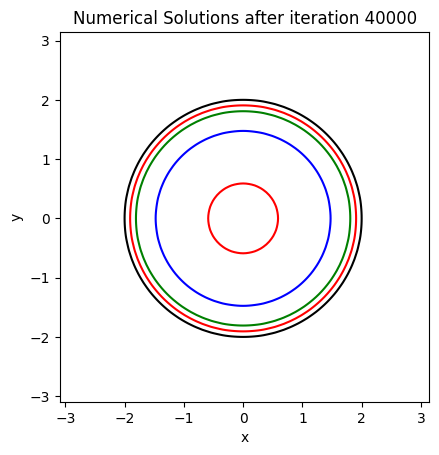

Initial and final conditions saved as:
- 'initial_condition.npy' and 'initial_condition.txt'
- 'final_output.npy' and 'final_output.txt'
Current u_iter shape: (128, 128)
Plotting value: (128, 128)


In [1]:

import jax
import numpy as np
import jax.random as random
import jax.numpy as jnp
import jax.numpy.fft as jfft
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
from numpy import sqrt
from numpy import round
from matplotlib import pyplot as plt
from matplotlib import contour
from jax.numpy.fft import fft2, ifft2
from jax.numpy.fft import fftn, ifftn
from numpy import real
from jax.example_libraries.stax import serial, Gelu
from jax.example_libraries.optimizers import optimizer, make_schedule
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# difinning the no of grid points in x, y and z
Nx = 128 # number of grid points in x be positive even integer number
Ny = 128 # number of grid points in y be positive even integer number


# Define the parameters of the Allen-Cahn equation in 2d
Lx = 2.0 * jnp.pi #length of the domain in x
Ly = 2.0 * jnp.pi #length of the domain in y
hx = Lx / Nx #spatial step size in coordinate x
hy = Ly / Ny #spatial step size in coordinate y
dt = 0.0001 #time step size
T = 4 #final time
Nt = int(jnp.round(T/dt)) #number of time steps
ns = Nt / 10 #number of snapshots

# Define the grid points in x and y direction
def x_gridpoint(Nx, Lx, hx):
    x = jnp.linspace(-0.5*Lx+hx,0.5*Lx,Nx)
    return x
x = x_gridpoint(Nx, Lx, hx) #number of grid points in x direction and step size and limitation on x  axis
def y_gridpoint(Ny, Ly, hy):
    y = jnp.linspace(-0.5*Ly+hy,0.5*Ly,Ny)
    return y
y = y_gridpoint(Ny, Ly, hy) #number of grid points in y direction and step size and limitation on y  axis 

# creating meshgrid in x and y direction
xx,yy = jnp.meshgrid(x,y) #creating meshgrid in x and y direction 

# defining parameters for the Allen-Cahn equation
#It determines the scale of the transition region (interface width) between phases. its the width of the interface, smaller epsillon refer to the sharp transition

epsillon = 0.05 #small parameter # interface thickness in the Allen-Cahn equation 
cahn = epsillon**2 #cahn number  

# initial condition of allen cahn equation
uk =jnp.tanh((2 -sqrt(xx**2 + yy**2)) / (sqrt(2) *epsillon)) #initial condition of allen cahn equation
# theta = jnp.arctan(y/x)
# u =jnp.tanh((1.7 - 1.2 * jnp.cos(6*theta) - sqrt(xx**2 + yy**2)) / (sqrt(2) *epsillon))


# defining the wavenumber in x and y direction , which is in fourier space
p = jnp.concatenate([2 * jnp.pi / Lx * jnp.arange(0, Nx//2), 2 * jnp.pi / Lx * jnp.arange(-Nx//2  , 0)]) # wavenumber in x direction
q = jnp.concatenate([2 * jnp.pi / Ly * jnp.arange(0, Ny//2), 2 * jnp.pi / Ly * jnp.arange(-Ny//2 , 0)])


# square of wavenumber in x and y direction
p2 = p**2 # square of wavenumber in x direction
q2 = q**2 # square of wavenumber in y direction

# creating meshgrid in x and y direction for square of wavenumber
pp2, qq2 = jnp.meshgrid(p2, q2)
#print(pp2.shape) # creating meshgrid in x and y direction for square of wavenumber


# # plotting the initial condition of the Allen-Cahn equation


#this figure code is pervious code 
figure1 = plt.figure()
plt.contour(x, y, jnp.real(uk.T), [0], colors = 'black')
plt.gca().set_aspect('equal', adjustable='box') 
plt.title('Initial condition')
plt.xlabel('x')
plt.ylabel('y')
# plt.show()


# # providing the range of iteration

for iter in range(1, Nt):
    u = jnp.real(uk)
    # print(f'real space u ko size ={u.shape}')
    # Transforming the solution to the discrete Fourier space
    s_hat = jfft.fft2(cahn * u - dt * (u**3 - 3 * u)) # us is the real space
    # print(f's_hat ko size = {s_hat.shape}')
    v_hat = s_hat / (cahn + dt * (2 + cahn * (pp2 + qq2)))  # Allen-Cahn equation
    uk = jfft.ifft2(v_hat)  # u_k+1 result
    # print(f'inverse u ko size = {u.shape}')

    if iter == 2000:
        plt.contour(x, y, jnp.real(uk.T), [0], colors='red')
        plt.gca().set_aspect('equal', adjustable='box')
        
    if iter == 4000:
        plt.contour(x, y, jnp.real(uk.T), [0], colors='green' )
        plt.gca().set_aspect('equal', adjustable='box')
    
    if iter == 10000:
        plt.contour(x, y, jnp.real(uk.T), [0], colors='blue')
        plt.gca().set_aspect('equal', adjustable='box')

    if iter == 20000:
        plt.contour(x, y, jnp.real(uk.T), [0], colors='red')
        plt.gca().set_aspect('equal', adjustable='box')
    

    # if iter % ns == 0:
    #     plt.contour(x, y, jnp.real(uk.T), [0], colors='red')
    #     plt.gca().set_aspect('equal', adjustable='box') 
    #     # np.save("initial_condition.npy", uk)
    #     # np.save("final_output.npy", jnp.real(u))


# from this line to the print initial and final condition saved as for data saved purpose
# Save the final output
  # Save in .txt format (readable)

plt.title('Numerical Solutions after iteration ' + str(Nt))
plt.show()


# # this is previous code   
# plt.title('Numerical Solutions after iteration ' + str(Nt))
# plt.show()

# Notify user of saved files
print("Initial and final conditions saved as:")
print("- 'initial_condition.npy' and 'initial_condition.txt'")
print("- 'final_output.npy' and 'final_output.txt'")
print(f"Current u_iter shape: {u.shape}")
print(f"Plotting value: {jnp.real(uk.T).shape}")






## Data generation (here data doesn't normalized)
#### We generated the data from Gausiaan process 2D, here parameter length_scale play the cruical role for the nature of the data because its gives the smoothness of the data and its gives the how much realted the two point of the data each other because its gives us covriance matrix and covariance matrix give us the relation between the data of two point
#### Also architecture of neural network also play the importance role as length scale . Here we design the FNO neural network with 2 hidden layer 
#### We genereted 28x28 resolution data with length scale [0.2, 0.5, 0.8, 1.0]

In [ ]:
import jax.numpy as jnp
import numpy as np
from jax import random
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import os
import time





# Exponential quadratic kernel (Gaussian kernel)
def exp_quadratic(X1, X2, length_scale):
    """Compute the exponential quadratic kernel."""
    dists = cdist(X1, X2, metric="sqeuclidean") #dists is distance and cdists is computed distance between two points 
    kernel = jnp.exp(-dists / (2 * length_scale**2)) # aply the kernel function, wich gives the smoothness of te function
    return kernel


# Gaussian process data generator
def gaussian_process_2d(x, n_grid, n_samples, length_scale_list, u_mean=0.0, key=None):
    """
    Generate 2D Gaussian process samples.
    
    Args:
        x: Tuple of domain limits [x1, x2, y1, y2].
        n_grid: Number of grid points in each dimension.
        n_samples: Number of samples to generate.
        length_scale_list: List of length scales for kernel.
        u_mean: Mean value for Gaussian process.
        key: PRNGKey for randomization.

    Returns:
        X: Grid points.
        ys: Samples generated from the Gaussian process.
    """
    x1, x2, y1, y2 = x
    # Create grid
    xx, yy = jnp.meshgrid(
        jnp.linspace(x1, x2, n_grid), jnp.linspace(y1, y2, n_grid)
    )
    grid_points = jnp.stack([xx.ravel(), yy.ravel()], axis=-1)

    if key is None:
        key = random.PRNGKey(42)

    samples = []
    for i in range(n_samples):
        
        key, subkey = random.split(key)  # Split the key to ensure randomness
        length_scale = random.choice(subkey, jnp.array(length_scale_list))
        # Compute covariance matrix
        cov = exp_quadratic(grid_points, grid_points, length_scale) # covariance matric is computed, which is used to generate the data, and its gives the relation between the points
        jitter = 1e-4 # this is used to make the matrix positive definite
        cov += jitter * jnp.eye(cov.shape[0])

        
        eigenvalues = jnp.linalg.eigvalsh(cov)
        
        # print("Covariance matrix eigenvalues min:", jnp.min(eigenvalues), "max:", jnp.max(eigenvalues))
        

        # Generate sample
        sample = random.multivariate_normal(key, u_mean * jnp.ones(grid_points.shape[0]), cov)
        samples.append(sample)
       


    return grid_points, jnp.array(samples)


# Data class
class Data:
    def __init__(self, x, n_grid, length_scale_list, num_samples):
        """
        Initialize data generator.

        Args:
            x: Tuple of domain limits [x1, x2, y1, y2].
            n_grid: Resolution of the grid (number of grid points per dimension).
            length_scale_list: List of length scales for the Gaussian process.
            train_num: Number of training samples to generate.
            test_num: Number of testing samples to generate.
        """
        self.x = x
        self.n_grid = n_grid
        self.length_scale_list = length_scale_list
        self.num_samples = num_samples
        # self.test_num = test_num
        self.__init_data()

    def __init_data(self):
        """Initialize training and testing data."""
        self.X, self.num_samples = self.u_data(self.num_samples)
        # _, self.u_test = self.u_data(self.test_num)

    def u_data(self, n_samples=1):
        """
        Generate Gaussian process data.

        Args:
            n_samples: Number of samples to generate.

        Returns:
            X: Grid points.
            us: Corresponding u(x) values at the grid points.
            us: Corresponding u(x) values at the grid points with 3 channels (RGB).
        """
        # Generate data using Gaussian process
        X, us = gaussian_process_2d(
            self.x, self.n_grid, n_samples, self.length_scale_list
        )

        


        # reshape data 
        # us = us - jnp.mean(us, axis=0)  # Subtract mean to introduce variance, help to centerized the data
        #us = normalize(us)
        us = us.reshape(-1, self.n_grid, self.n_grid)  # Reshape to (n_samples, n_grid, n_grid, 1)
        us = jnp.expand_dims(us, axis=-1)
        return X, us 



# Example Usage
if __name__ == "__main__":
    # Example: Adjust resolution and domain length
    domain = (-jnp.pi, jnp.pi, -jnp.pi, jnp.pi)  
    resolution = 28  # Number of grid points per dimension
    length_scale_list = [0.2, 0.5, 0.8, 1.0]  # Kernel length scales # its indicate the smoothness of the data 
    num_samples = 10000 # Number of training samples
    

    # Create data object
    data = Data(domain, resolution, length_scale_list, num_samples)

    # Specify the directory where y want to save the data
    save_dir = './data_generation_checking/'

     # Ensure the directory exists, create it if not
    os.makedirs(save_dir, exist_ok=True)

    

    # Save the training and testing data
    # print("Saving training data to u_train.npy...")
    np.save(os.path.join(save_dir, "phasefield2d_data_28x28_10k.npy"), np.array(data.num_samples))


    # print("Saving grid points to grid.npy...")
    np.save(os.path.join(save_dir, "grid2d_28x28_10k.npy"), np.array(data.X))





## visualizing the dataset by plotting the randomly selected samples

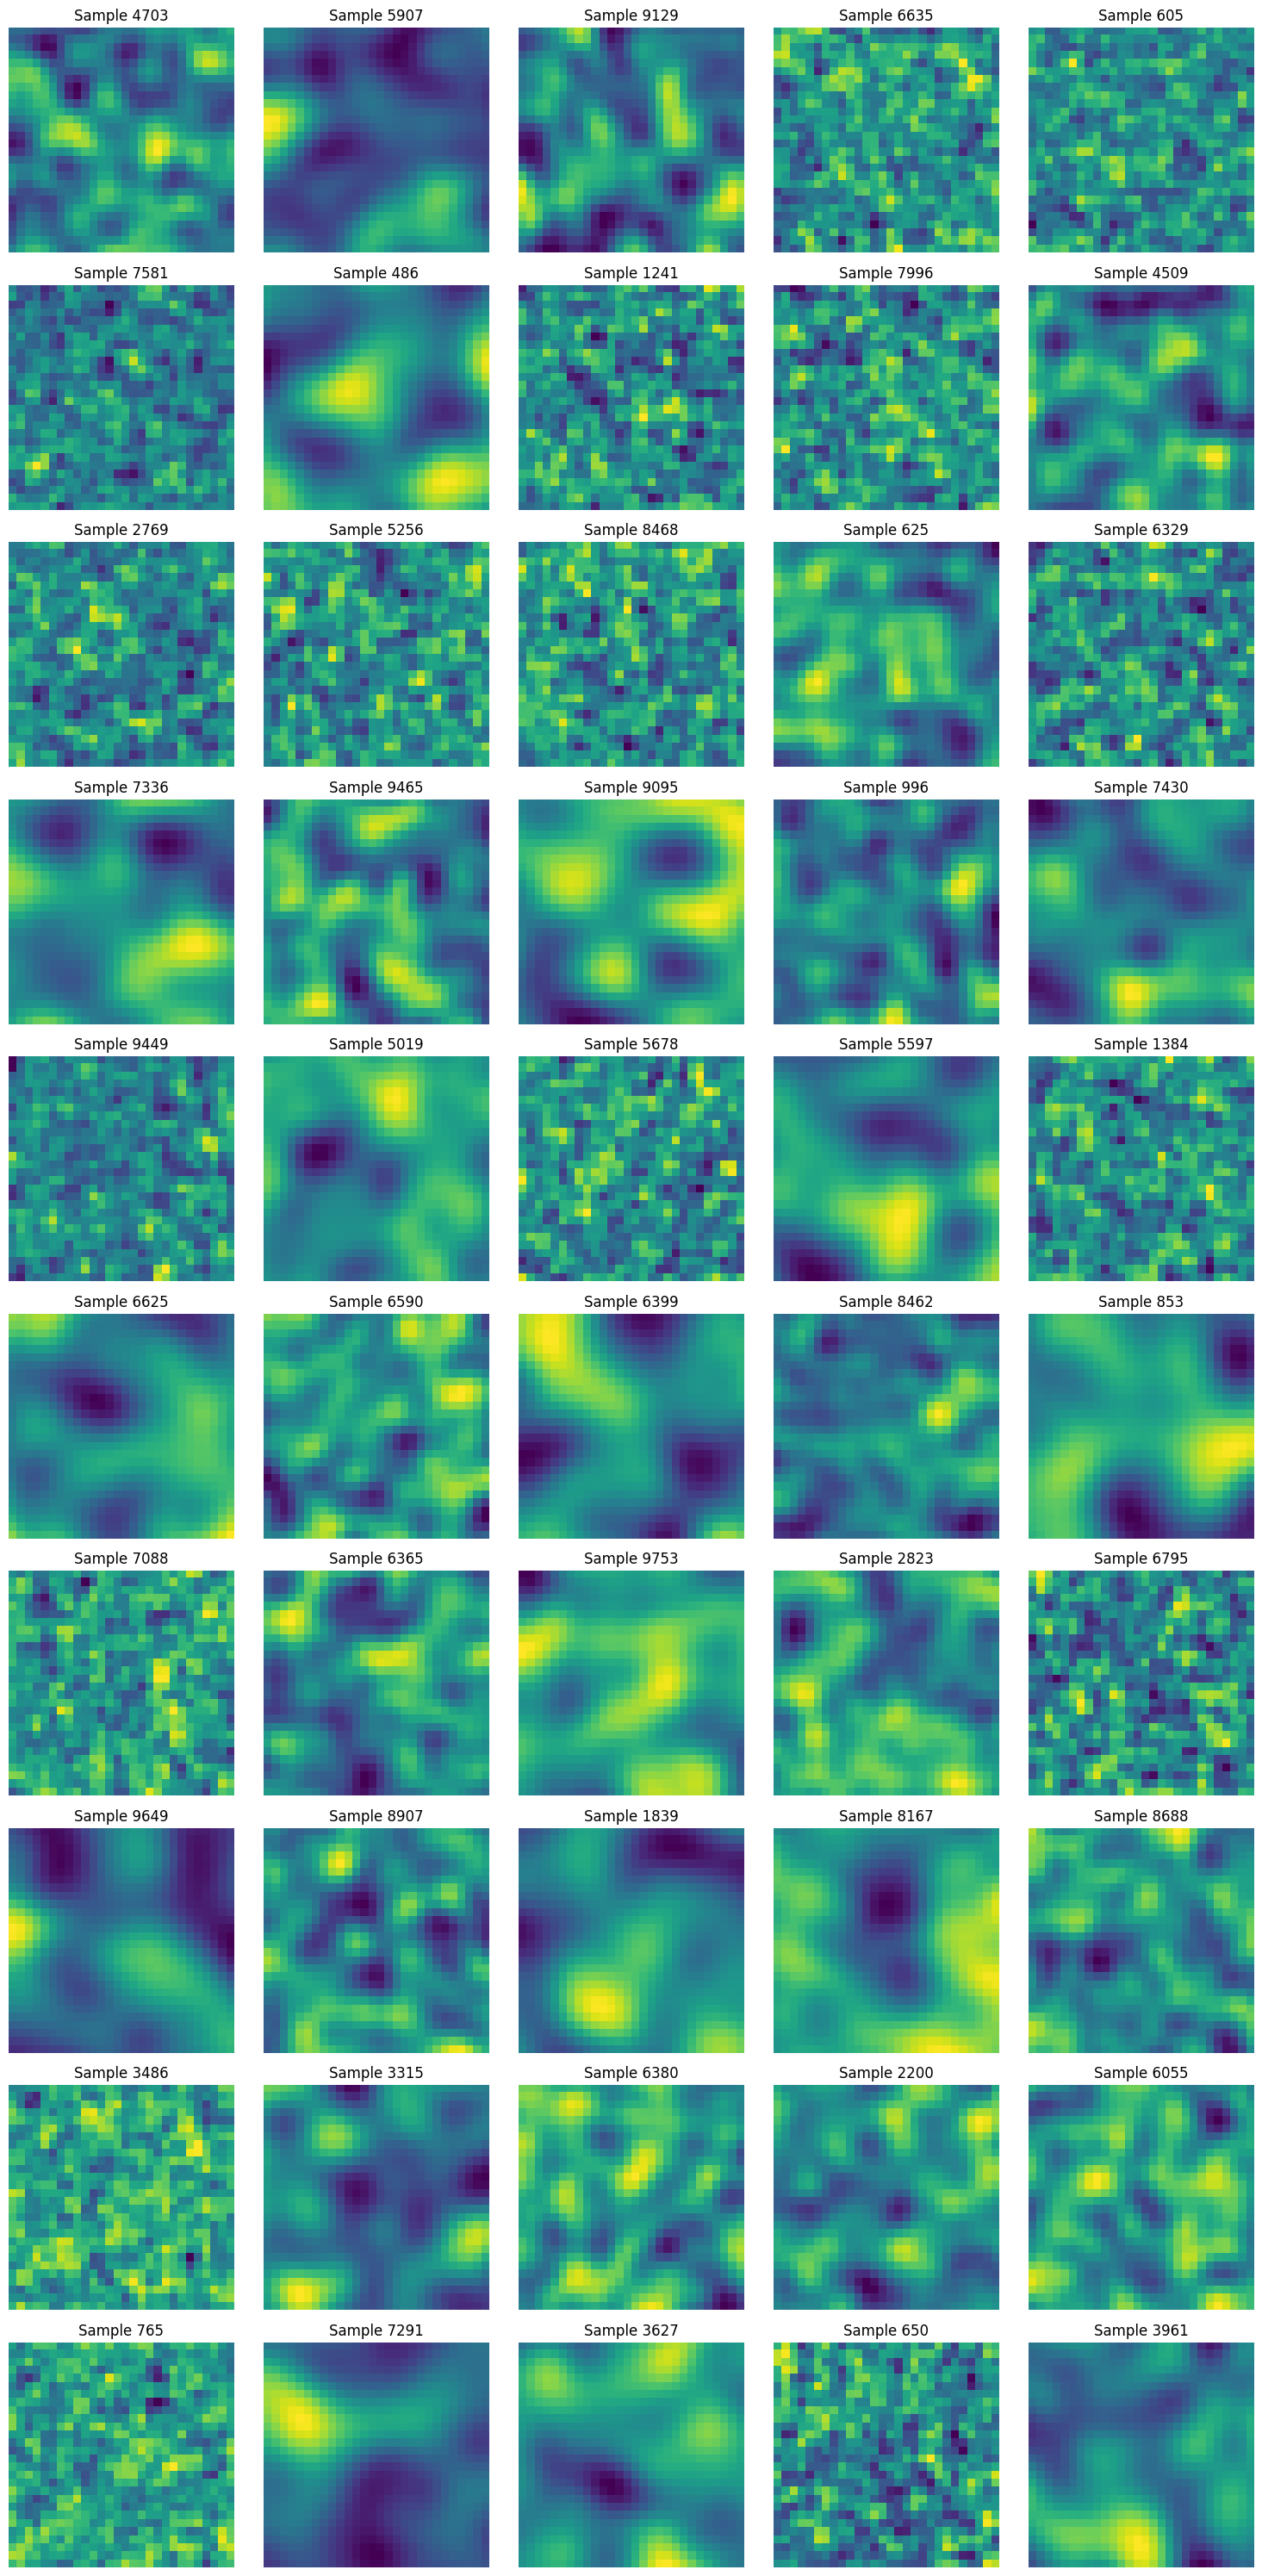

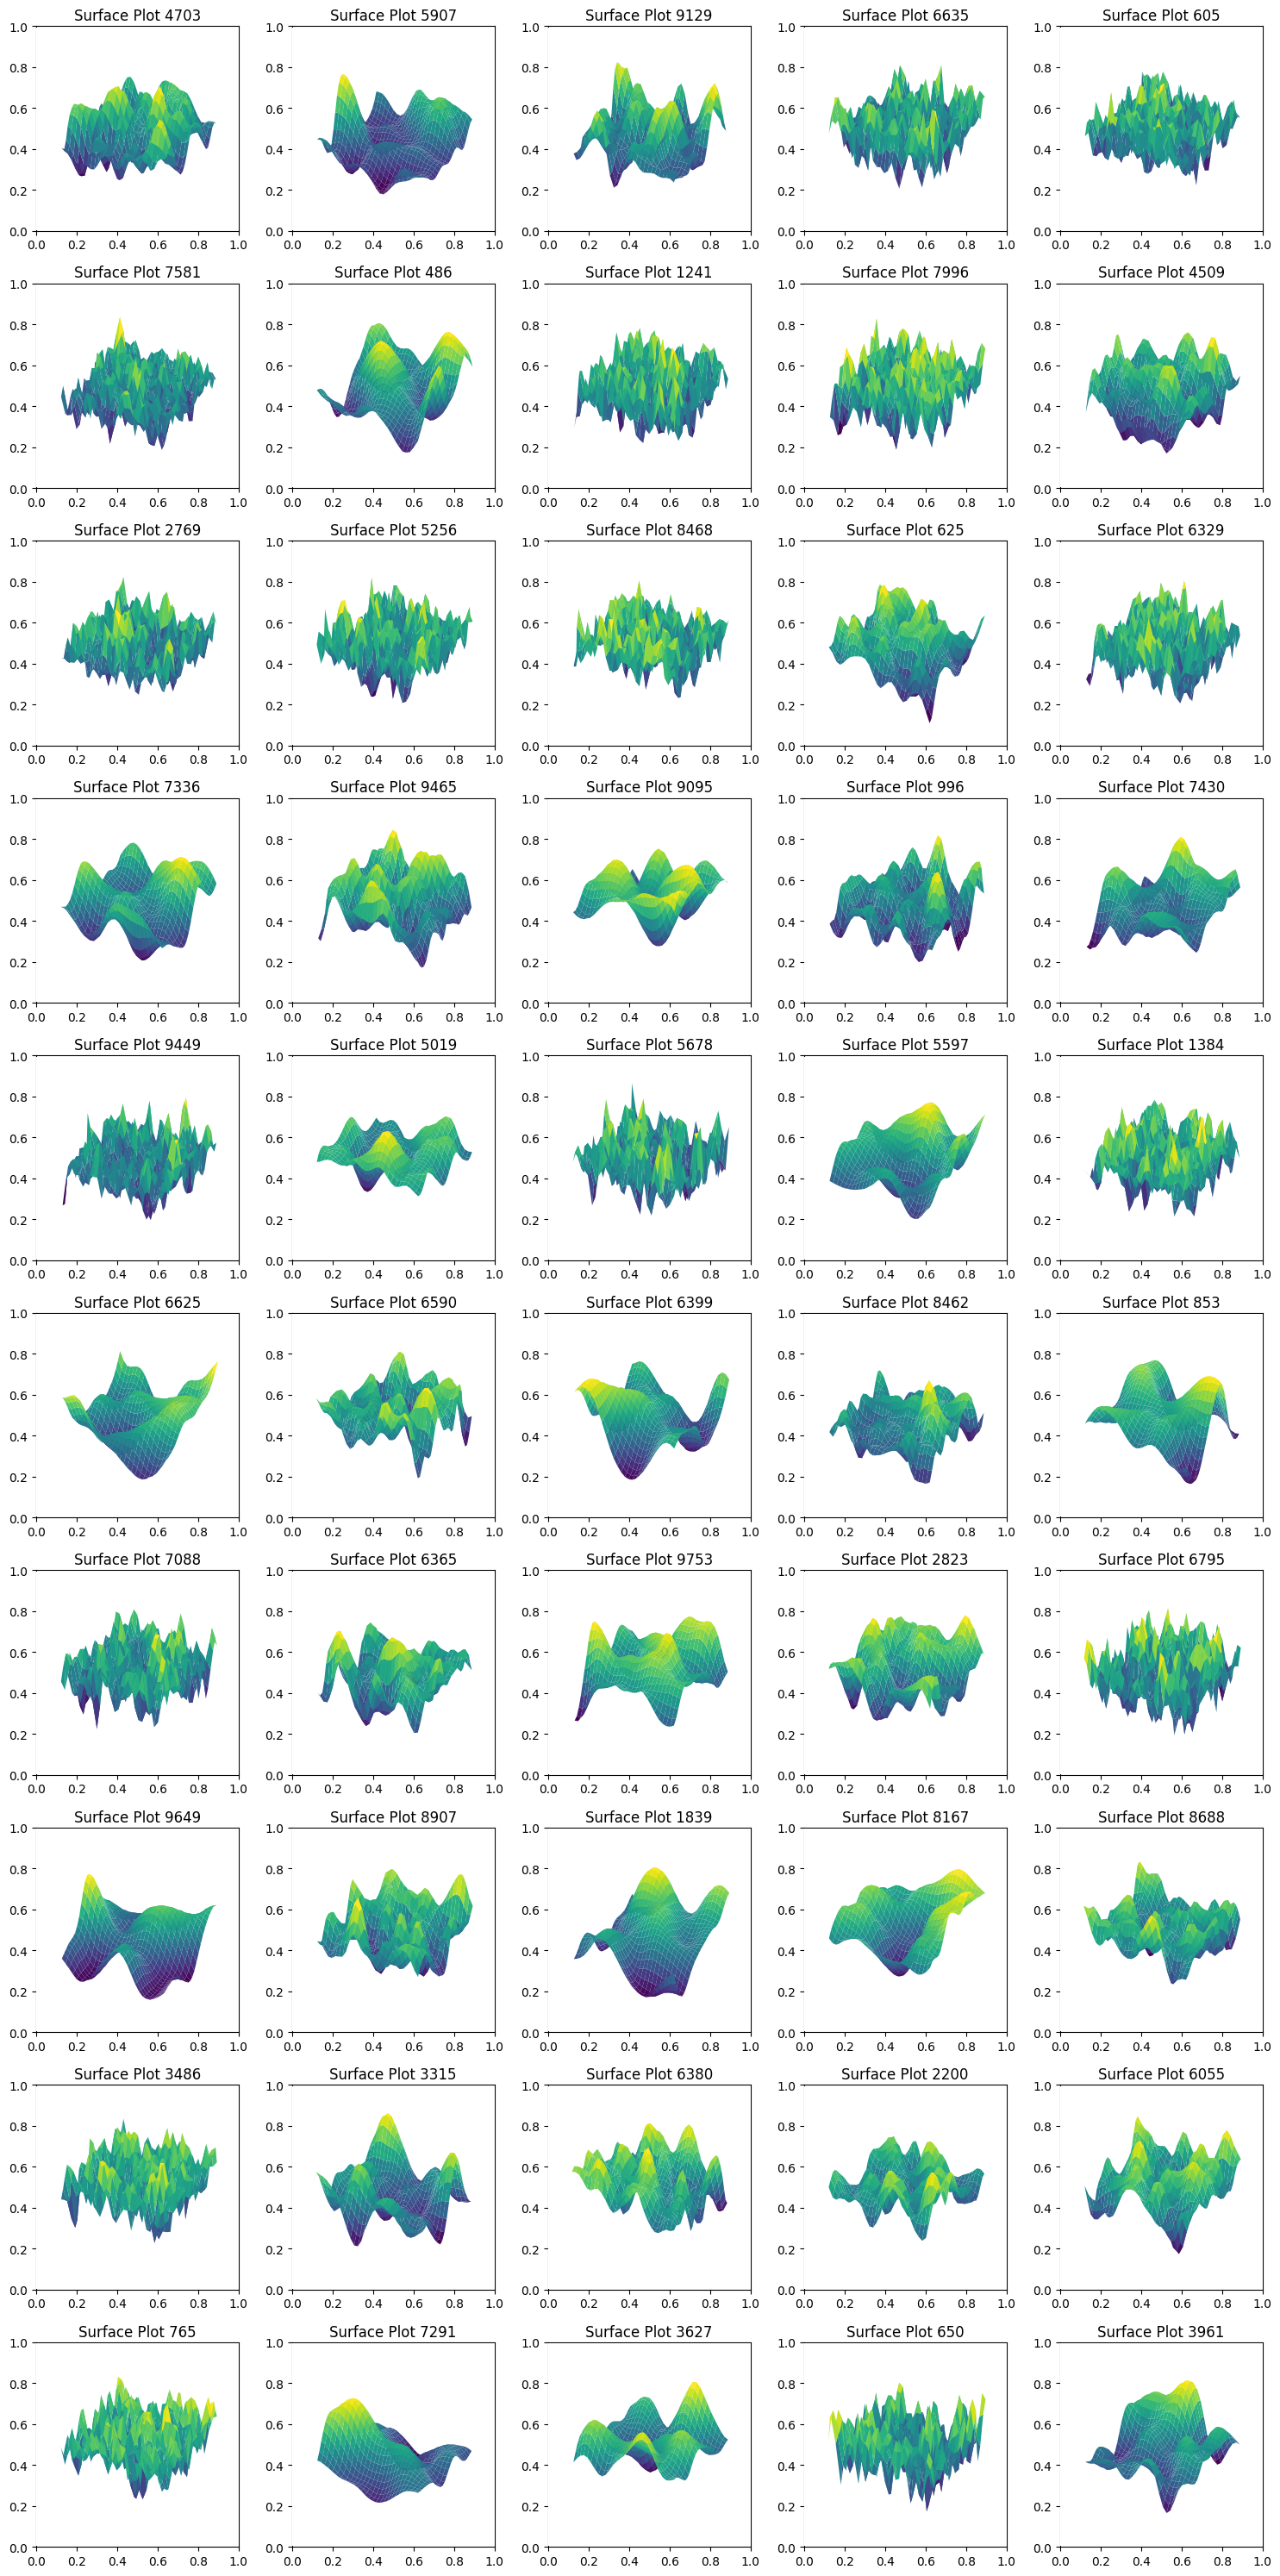

In [47]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from scipy.signal import correlate2d
import numpy as np
import matplotlib.pyplot as plt





def plot_random_samples(samples, random_indices, num_to_plot):
    """
    Plot a random subset of samples without unnecessary gaps.
    """
    rows = int(np.ceil(num_to_plot / 5))  # Adjust rows dynamically
    cols = min(num_to_plot, 5)  # At most 5 columns

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = np.array(axes).flatten()  # Ensure it's always a 1D array

    for i, idx in enumerate(random_indices):
        sample = samples[idx].squeeze()
        axes[i].imshow(sample, cmap='viridis')
        axes[i].set_title(f"Sample {idx}")
        axes[i].axis('off')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(f'plots/ random_plot_samples_{num_to_plot}.png')
    plt.show()
   





def plot_random_surface_plot_samples(samples, random_indices, num_to_plot):
    """
    Plot a random subset of samples.
    # """
    # print(f'shape of the samples: {samples.shape}')
    # num_samples = samples.shape[0]
    # random_indices = np.random.choice(num_samples, num_to_plot, replace=False)

    rows = int(np.ceil(num_to_plot / 5))  # Adjust rows dynamically
    cols = min(num_to_plot, 5) 

    # Create a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = np.array(axes).flatten()   # Flatten the 2D array of axes to make indexing easier

    for i, idx in enumerate(random_indices):
        sample = samples[idx].squeeze()  # Remove any single-dimensional entries
        height, width = sample.shape[:2]

        # Create the 2D meshgrid for plotting
        x = np.linspace(-np.pi, np.pi, width)
        y = np.linspace(-np.pi, np.pi, height)
        xv, yv = np.meshgrid(x, y)

        # Prepare the subplot for the 3D surface plot
        axes[i] = fig.add_subplot(10, 5, i+1, projection='3d')  # Update axes for 3D plotting
        axes[i].plot_surface(xv, yv, sample, cmap='viridis')  # Plot the surface
        axes[i].set_title(f"Surface Plot {idx}")  # Set title for each subplot
        axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(f'plots/ surface_plot_samples_{num_to_plot}.png')
    plt.show()
    


def plot_surface(sample, title="Surface Plot"):
    """
    Create a 3D surface plot of the sample.
    """
    height, width = sample.shape[:2]
    sample_2d = sample.squeeze()  # Remove channel dimension

    x = np.linspace(-np.pi, np.pi, width)
    y = np.linspace(-np.pi, np.pi, height)
    xv, yv = np.meshgrid(x, y)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xv, yv, sample_2d, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Value")
    plt.show()

samples = np.load("./data_generation_checking/phasefield2d_data_28x28_10k.npy")
num_to_plot = 50
num_samples = samples.shape[0]
random_indices = np.random.choice(num_samples, num_to_plot, replace=False)


#plot_surface(data.num_samples[0])
plot_random_samples(samples, random_indices, num_to_plot)
plot_random_surface_plot_samples(samples,random_indices, num_to_plot)



## Training and Testing SPiFOL model( I defined the training and testing function like as spifol here), and NeuralNetwork is trianing without normalized data


  0%|          | 0/5000 [00:00<?, ?it/s]c:\Users\Manju\Documents\python\envs\myenv\lib\site-packages\jax\_src\lax\lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
100%|██████████| 5000/5000 [1:23:37<00:00,  1.00s/it, train Loss=0.05277865, test loss=0.05089083]   


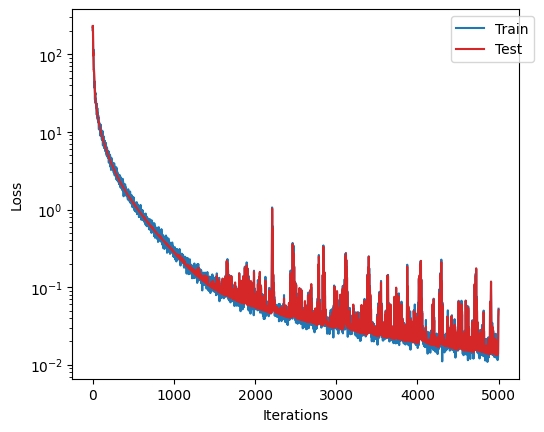

In [2]:
import jax
import jax.numpy as jnp
from jax import grad, jit, random
from jax.example_libraries.stax import Dense, Gelu, serial
from jax.example_libraries.optimizers import optimizer, make_schedule
# from jax.scipy.fftpack import fftn, ifftn
import numpy as np
import matplotlib.pyplot as plt
from torch import no_grad
from tqdm import trange
from functools import partial
from jax.numpy.fft import fftn, ifftn, fftshift, ifftshift
from jax.example_libraries.optimizers import exponential_decay
import jax.numpy.fft as jfft
from jax.example_libraries.stax import Dense, Gelu, serial, glorot_normal
from spifol_archs import FNOBlock2D, Permute, complex_adam, MLP, modified_MLP
from jax import vmap
from torch.utils import data
from jax import lax
from jax import debug
from jax.flatten_util import ravel_pytree
import itertools
from matplotlib.cm import tab20
from sklearn.metrics import r2_score, mean_squared_error






def fft2(x):
   """Applies a 2D FFT over the first two dimensions of the input array x."""
   return fftn(x, axes=(0, 1))


def ifft2(x):
   """Applies a 2D inverse FFT over the first two dimensions of the input array x."""
   return ifftn(x, axes=(0, 1))



# @jax.jit
def normalize(data):
    min_val = jnp.min(data, axis=(0, 1))
    max_val = jnp.max(data, axis=(0, 1))
    range_val = max_val - min_val
    range_val = jnp.where(range_val == 0, 1, range_val)  # Avoid division by zero
    normalized_data = 2 * (data - min_val) / range_val - 1
    return normalized_data, min_val, range_val 



def denormalize(normalized_data, min_val, range_val):
    range_val = jnp.where(range_val == 0, 1, range_val)  # Ensure no division by zero
    data = ((normalized_data + 1) * range_val) / 2 + min_val
    return data



# Data genrator to make randomized batches
class DataGenerator(data.Dataset):
    def __init__(self, u,
                 batch_size=64, rng_key=random.PRNGKey(1234)):
        'Initialization'
        self.u = u # input sample

        self.N = u.shape[0]
        self.batch_size = batch_size
        self.key = rng_key

    def __getitem__(self, index):
        'Generate one batch of data'
        self.key, subkey = random.split(self.key)
        u = self.__data_generation(subkey)
        return u

    #@partial(jit, static_argnums=(0,))
    def __data_generation(self, key):
        'Generates data containing batch_size samples'
        idx = random.choice(key, self.N, (self.batch_size,), replace=False)
        u = self.u[idx,:]
        # Construct batch
        return u





class SPiFOL:
    def __init__(self, L, x, y, h, eps, pp2, qq2, dt,  N, fno_layers, mlp_layers,lr, arch):
        self.arch = arch
        self.N = N
        self.lr = lr
        # self.norm_par = norm_par
        self.eps = eps
        self.pp2 = pp2
        self.qq2 = qq2
        self.dt = dt
        self.L = L
        self.h = h
        self.x = x
        self.y = y
        # Initialize the network based on architecture type
        if arch == 'FNO':
            self.N_init, self.N_apply = serial(*fno_layers)
            _, params = self.N_init(random.PRNGKey(1234), (-1, N, N, 1))
            
        elif arch == 'MLP':
            self.N_init, self.N_apply = MLP(mlp_layers)
            params = self.N_init(random.PRNGKey(1234))
            
        elif arch == 'modified_MLP':
            self.N_init, self.N_apply = modified_MLP(mlp_layers)
            params = self.N_init(random.PRNGKey(1234))
        else:
            raise ValueError("Unsupported architecture!")


        self.params = params



        # Optimizer setup
        self.opt_init, self.opt_update, self.get_params = complex_adam(
            jax.example_libraries.optimizers.exponential_decay(
                lr, decay_steps=2000, decay_rate=0.9)
            )

        self.opt_state = self.opt_init(self.params)
        


        # Logging losses
        self.train_losses = []
        self.test_losses = []  # Initialize list to track test losses


          # Initialize optimizer state
        self.opt_state = self.opt_init(self.params)
        _, self.unravel = ravel_pytree(params)  # Assuming all networks have the same structure
        self.itercount = itertools.count()

       
  

    

    
    # @partial(jit, static_argnums=(0,))
    def operator_net(self, params, uk):
        if self.arch == 'FNO':
            
            input_FNO = uk.reshape(-1, self.N, self.N, 1)  # Reshape for FNO
    
            O = self.N_apply(params, input_FNO)  # Apply the FNO network 
            O = O.reshape(self.N, self.N, 1)  # Reshape output
            return O
        elif self.arch == 'MLP':
            uk = uk.flatten()
            O = self.N_apply(params, uk)  # Directly apply the network
            O = O.reshape(uk.shape[0], self.N, self.N, uk.shape[3])  # Reshape output to match strain components
            return O
        elif self.arch == 'modified_MLP':
            uk = uk.flatten()
            O = self.N_apply(params, uk)
            O = O.reshape(uk.shape[0], self.N, self.N, uk.shape[3])
            return O
        else:
            raise ValueError("Unsupported architecture type!")
      

    def allen_cahn_equation(self, uk):
         
        
            # Expand pp2 and qq2 to include a channel dimension
        self.pp2 = jnp.expand_dims(self.pp2, axis=(0, -1))                                                                                 
        self.qq2 = jnp.expand_dims(self.qq2, axis=(0, -1)) 
    

        cahn = eps**2
        uk = jnp.real(uk)

        # Compute denominator in Fourier space
        denominator = cahn + self.dt * (2 + cahn * (self.pp2 + self.qq2))  
        

        # Perform FFT calculations
        s_hat = jfft.fft2(cahn * uk - self.dt * (uk**3 - 3 * uk)) 
        v_hat = s_hat / denominator  
        uk = jfft.ifft2(v_hat)  
        uk = uk.reshape(self.N, self.N, 1)
     
        return jnp.real(uk) # Return only the real part



    @partial(jit, static_argnums=(0,))
    def loss_single(self, params, uk):
        # uk is the input data and u_nn is the next uK+1 data of neural network and u_ac is also next u_ac_k+1 data
        
        u_nn = self.operator_net(params, uk) # predicted or next value of the initial condition
        u_nn = u_nn.reshape(self.N, self.N, 1)     
        u_ac = self.allen_cahn_equation(uk)
        datadriven_loss = jnp.mean((u_ac - u_nn) ** 2)
        return datadriven_loss

    @partial(jit, static_argnums=(0,))
    def loss_batches(self, params, batch):
       
        batch_loss = vmap(self.loss_single, (None, 0))(params, batch)
        batch_loss  = jnp.mean(batch_loss)
        return batch_loss


    @partial(jit, static_argnums=(0,))
    def step(self, i, opt_state, uk):
        params = self.get_params(opt_state)
        grads = grad(self.loss_batches)(params, uk)
        return self.opt_update(i, grads, opt_state)


   # Update the train method of tum_epochshe SPiFOL class
    def train(self, dataset, data_test, nIter=10000):
        data = iter(dataset)
        pbar = trange(nIter)  # Progress bar for total iterations


        for it in pbar:
            batch = next(data)
            batch = jnp.array(batch)
            self.opt_state = self.step(next(self.itercount), self.opt_state, batch)

            if it % 1 == 0:
                params = self.get_params(self.opt_state)
                loss = self.loss_batches(params, batch)
                loss_test = self.loss_batches(params, data_test)
                self.train_losses.append(loss)
                self.test_losses.append(loss_test)
                pbar.set_postfix({'train Loss': loss, 'test loss': loss_test})


    def accuracy(self, data_test, pp2, qq2):
        uk_solver_list = []
        uk_nnetwork_list = []

        

        pp2 = jnp.expand_dims(pp2, axis=(0, -1)) 
        qq2 = jnp.expand_dims(qq2, axis=(0, -1))  
        

        for item in data_test:

            cahn = eps**2
            uk = jnp.real(item)
           

            # Compute denominator in Fourier space
            denominator = cahn + dt * (2 + cahn * (pp2 + qq2)) 
            
            # Perform FFT calculations
            s_hat = jfft.fft2(cahn * uk - dt * (uk**3 - 3 * uk))  
            v_hat = s_hat / denominator  
            uk_ac = jfft.ifft2(v_hat)  
            uk_ac = uk.reshape(self.N, self.N, 1)
            uk_solver_list.append(uk_ac)

            params = self.get_params(self.opt_state)
    
            uk_nnetwork = self.operator_net(params, item)
            uk_nnetwork_list.append(uk_nnetwork)
        uk_solver = jnp.array(uk_solver_list)
        uk_nnetwork = jnp.array(uk_nnetwork_list)

        #  flatten 
        u_pred = jnp.reshape(uk_nnetwork, (uk_nnetwork.shape[0], -1 ))  
        u_true = jnp.reshape(uk_solver, (uk_solver.shape[0], -1))  
        
        # Compute R² Score
        r2 = r2_score(jnp.array(u_true), jnp.array(u_pred))  

        # Compute Mean Squared Error (MSE)
        mse = mean_squared_error(jnp.array(u_true), jnp.array(u_pred))  

        # Compute L₂ Relative Error (normalized error)
        l2_rel = jnp.linalg.norm(u_true - u_pred) / jnp.linalg.norm(u_true)  # L2 error

        
        
        return r2, mse, l2_rel, uk_solver, uk_nnetwork



    def plot_losses(self, save_as):
            # Convert loss array and jax numpy array for plotting
            total_train_loss = jnp.asarray(self.train_losses)
            total_test_loss = jnp.asarray(self.test_losses)
            
            
            #print(total_loss)
            color = tab20.colors
            x_axis = jnp.arange(1, total_train_loss.size + 1, 1) # x_axis: Epoch numbers from 1 to 100

            #print(x_axis)
            # Create plot
            plt.figure(constrained_layout=True)
            ax = plt.subplot(111)

            plt.semilogy(x_axis, total_train_loss, label="Train", c=color[0])
            plt.semilogy(x_axis, total_test_loss, label="Test", c=color[6])
            #plt.semilogy(x_axis, mm_loss, label="Material Model", c=color[1])
            #plt.semilogy(x_axis, div_loss, label="Div Loss", c=color[2])
            plt.ylabel("Loss")
            plt.xlabel("Iterations")
            plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1))
            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
            plt.savefig(save_as + "Total_loss.png")

                


# Parameters
N = 28 # no. of grid points
eps = 0.05 # epsillon 
lr = 0.001 # learning rate
dt = 0.0001 # time step or time increment
L = 2 * jnp.pi # length of domian
h = L/N # spacing between grid or length of grid
x = jnp.linspace(-0.5 * L + h, 0.5 * L, N)
y = jnp.linspace(-0.5 * L + h, 0.5 * L, N)
xx, yy = jnp.meshgrid(x, y)


 # number of epochs for training


 # defining the wavenumber in x and y direction , which is in fourier space
p = jnp.concatenate([2 * jnp.pi / L * jnp.arange(0, N//2), 2 * jnp.pi / L * jnp.arange(-N//2  , 0)]) # wavenumber in x direction
q = jnp.concatenate([2 * jnp.pi / L * jnp.arange(0, N//2), 2 * jnp.pi / L * jnp.arange(-N//2 , 0)])
p2 = p**2 # square of wavenumber in x direction
q2 = q**2 # square of wavenumber in y direction
pp2, qq2 = jnp.meshgrid(p2, q2)




mlp_layers = [16384, 32, 32, 16384]


# Define FNO layers
fno_layers = [
   Dense(64),
   Permute("ijkl->iljk"),
   FNOBlock2D(15),
   Gelu,  # activation can be changed here
   FNOBlock2D(15),
   Gelu,
   FNOBlock2D(15),
   Permute("ijkl->iklj"),
   Dense(128),
   Gelu,
   Dense(1),
]

cahn = eps**2
epochs = 5000

data = np.load('data_generation_checking/phasefield2d_data_28x28_10k.npy')
# normalized_data, min_val, range_val = normalize(data) 
# Generate the data trainig samples
dataset = DataGenerator(data[:9800], batch_size=20)
data_test = data[9800:9900]




#    # Initialize and train the model
NN_model = SPiFOL(L, x, y, h, eps, pp2, qq2, dt, N, fno_layers, mlp_layers, lr, arch= 'FNO')
NN_model.train(dataset, data_test, nIter = epochs)
r2, mse, l2_rel, u_solver, u_pred = NN_model.accuracy(data_test, pp2, qq2)

NN_model.plot_losses(f'plots/training_log_iter_{epochs}.png')







            

## comparing data between network predicted and solver predicted by randomly selected sampes from the testing data and NN training without normalized data

r2: 0.93
mse: 0.06
l2-rel: 0.25999999046325684


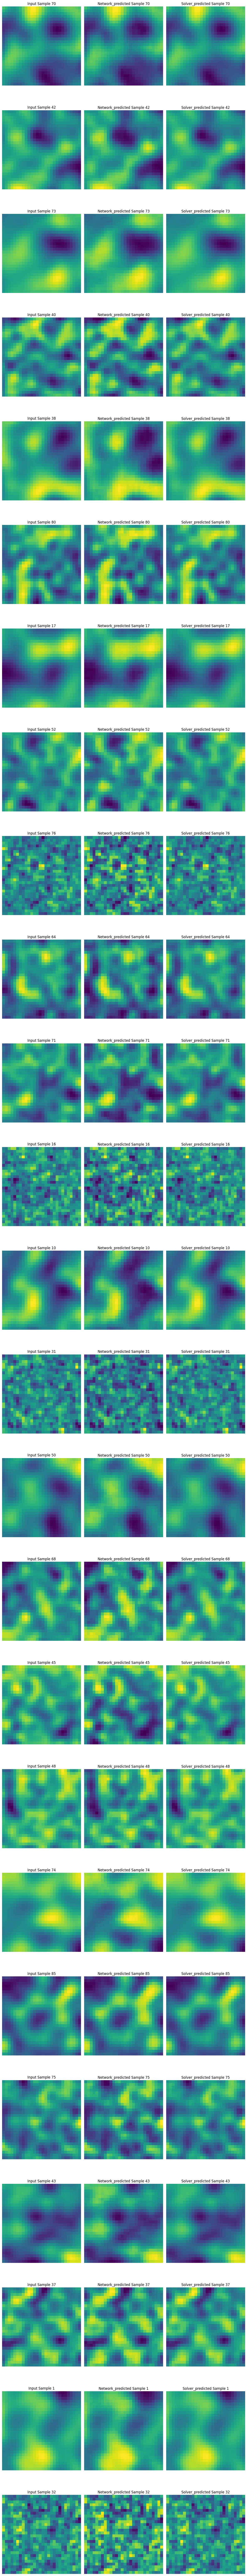

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_samples(data_test, uk_pred, uk_solver, random_indices):
    """
    Plot a random subset of samples dynamically adjusting rows.
    """
    
    num_cols = 3  # Each sample has 3 subplots
    num_rows = len(random_indices)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))  # Adjust figure size dynamically

    # Ensure axes is always a 2D array for consistent indexing
    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)  # Make it 2D if there's only one row

    for i, idx in enumerate(random_indices):
        sample_test = data_test[idx].squeeze()
        axes[i, 0].imshow(sample_test, cmap='viridis')
        axes[i, 0].set_title(f"Input Sample {idx}")
        axes[i, 0].axis('off')

        sample_pred = uk_pred[idx].squeeze()
        axes[i, 1].imshow(sample_pred, cmap='viridis')
        axes[i, 1].set_title(f"Network_predicted Sample {idx}")
        axes[i, 1].axis('off')

        sample_solver = uk_solver[idx].squeeze()
        axes[i, 2].imshow(sample_solver, cmap='viridis')
        axes[i, 2].set_title(f"Solver_predicted Sample {idx}")
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()


# Example Usage
num_to_plot = 25  # Adjust dynamically
num_samples = u_pred.shape[0]
random_indices = np.random.choice(num_samples, num_to_plot, replace=False)

print(f'r2: {round(r2, 2)}\nmse: {round(mse, 2)}\nl2-rel: {round(l2_rel, 2)}' )

plot_random_samples(data_test, u_pred, u_solver, random_indices)


